###          Reference Documents:
<a href='https://spark.apache.org/docs/latest/configuration.html#application-properties'>Spark Doc</a></br>
<a href='https://help.syntasa.com/hc/en-us'>Syntasa Documentation</a></br>
<a href='https://www.youtube.com/@syntasauniversity1544/featured'>Syntasa University</a></br>

In [21]:
!pip install wget -q

In [22]:
import os
import wget

In [24]:
!pip install torch torchvision -q

In [31]:
!wget https://github.com/openai/CLIP/archive/refs/heads/main.zip
!unzip -o main.zip
%cd CLIP-main
!pip install .


--2024-10-14 10:17:16--  https://github.com/openai/CLIP/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/openai/CLIP/zip/refs/heads/main [following]
--2024-10-14 10:17:16--  https://codeload.github.com/openai/CLIP/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4317922 (4.1M) [application/zip]
Saving to: ‘main.zip.8’

100%[======================================>] 4,317,922   --.-K/s   in 0.06s   

2024-10-14 10:17:16 (71.3 MB/s) - ‘main.zip.8’ saved [4317922/4317922]

Archive:  main.zip
dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  inflating: CLIP-main/.github/workflows/test.yml  
  inflating: CLIP-main/.gitignore    
  inf

In [36]:
!pip install pillow -q
!pip install pathlib -q
import torch
from PIL import Image
import pathlib

In [38]:
os.environ['SETUPTOOLSUSEDISTUTILS']='stdlib'

In [39]:
import clip

In [41]:
import requests
from io import BytesIO

In [54]:
def return_image(url):
    response=requests.get(url)
    image_array=BytesIO(response.content)
    image=Image.open(image_array)
    return image

In [44]:
url1='https://images.pexels.com/photos/691583/pexels-photo-691583.jpeg?cs=srgb&dl=pexels-ezz7-691583.jpg&fm=jpg'

In [45]:
url2='https://static.vecteezy.com/system/resources/previews/027/539/969/non_2x/european-shorthair-cat-sitting-on-white-background-ai-generative-free-photo.jpeg'

In [55]:
i1=return_image(url1)

In [56]:
i2=return_image(url2)

In [50]:
!pip install matplotlib -q
import matplotlib.pyplot as plt

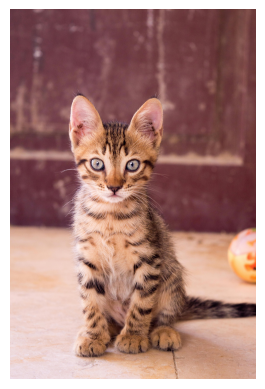

In [64]:
plt.imshow(i1)
plt.axis('off')
plt.savefig('/tmp/cat1.jpg')
plt.show()


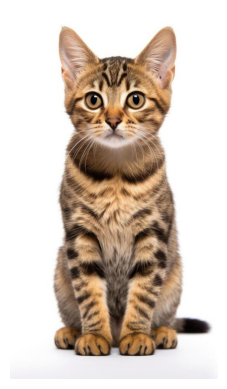

In [65]:
plt.imshow(i2)
plt.axis('off')
plt.savefig('/tmp/cat2.jpg')
plt.show()


In [72]:
images=['/tmp/cat1.jpg','/tmp/cat2.jpg']

In [68]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [69]:
device

'cpu'

In [70]:
model, process=clip.load('ViT-B/32',device=device)

In [73]:
i=[process(Image.open(image_path)).unsqueeze(0).to(device) for image_path in images]

In [75]:
i

[tensor([[[[1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           ...,
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303],
           [1.9303, 1.9303, 1.9303,  ..., 1.9303, 1.9303, 1.9303]],
 
          [[2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           ...,
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749],
           [2.0749, 2.0749, 2.0749,  ..., 2.0749, 2.0749, 2.0749]],
 
          [[2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
           [2.1459, 2.1459, 2.1459,  ..., 2.1459, 2.1459, 2.1459],
           [2.1459, 2.14

In [76]:
prompts=['curious cat','cute cat']

In [77]:
texts=clip.tokenize(prompts).to(device)

In [79]:
with torch.no_grad():
    image_features=torch.cat([model.encode_image(image) for image in i])
    text_features=model.encode_text(texts)

In [80]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [81]:
similarity=(100.0*image_features @ text_features.T).softmax(dim=-1)

In [82]:
similarity

tensor([[0.0716, 0.9284],
        [0.1122, 0.8878]])

In [83]:
for i,image_path in enumerate(images):
    print(f'Image: {image_path}')
    for j, prompt_text in enumerate(prompts):
        print(f'PROMPT TEXT: {prompt_text}  SIMILARITY: {similarity[i][j].item():.4f}')

Image: /tmp/cat1.jpg
PROMPT TEXT: curious cat  SIMILARITY: 0.0716
PROMPT TEXT: cute cat  SIMILARITY: 0.9284
Image: /tmp/cat2.jpg
PROMPT TEXT: curious cat  SIMILARITY: 0.1122
PROMPT TEXT: cute cat  SIMILARITY: 0.8878


In [84]:
best_matches=similarity.argmax(dim=-1)

In [86]:
best_matches

tensor([1, 1])

## Testing how many images have sky

In [91]:
urls=['https://i.pinimg.com/736x/dc/f9/31/dcf9313456f07a084a22765a5a993c85.jpg','https://www.seadstem.org/wp-content/uploads/2022/05/clouds-7050884_1920-768x512.jpg','https://static.vecteezy.com/system/resources/previews/009/273/206/non_2x/a-large-meadow-in-the-background-is-the-sky-nature-background-image-concept-free-photo.jpg','https://img.lovepik.com/background/20211022/large/lovepik-grass-sky-background-image_401769647.jpg','https://images.pexels.com/photos/55787/pexels-photo-55787.jpeg?cs=srgb&dl=pexels-donaldtong94-55787.jpg&fm=jpg','https://petapixel.com/assets/uploads/2022/04/DSC2869-Edit-sharpened-800x534.jpg','https://www.wildernessshots.com/wp-content/uploads/2019/09/Koosah-Falls-Oregon-Landscape-Photography-768x518.jpg','https://www.eurokidsindia.com/blog/wp-content/uploads/2023/10/oceans-of-the-world.jpg','https://d2908q01vomqb2.cloudfront.net/9e6a55b6b4563e652a23be9d623ca5055c356940/2021/06/08/NOAA-BDP-World-Ocean-Day-adobe-stock-ocean-deep-blue-fish-cave-1200x600-1.jpg','https://media.wired.com/photos/64c984a24a854832b16fd35e/1:1/w_1600,h_1600,c_limit/openwaters_science_GettyImages-1493480532.jpg']

In [95]:
def return_image(url):
    response = requests.get(url)
    if response.status_code == 200:
        image_array = BytesIO(response.content)
        try:
            image = Image.open(image_array)
            return image
        except UnidentifiedImageError:
            print(f"Cannot identify image from {url}")
            return None
    else:
        print(f"Failed to retrieve image from {url}, Status Code: {response.status_code}")
        return None

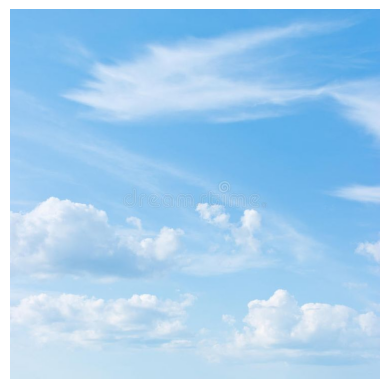

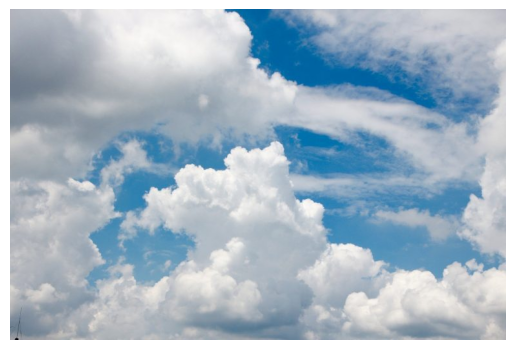

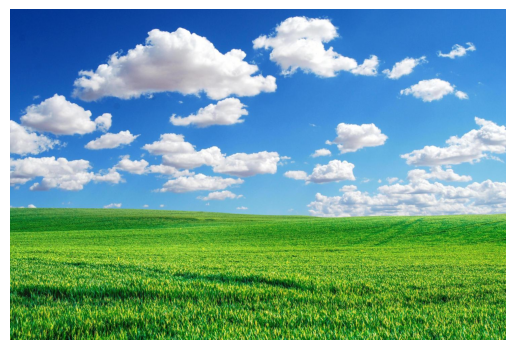

Failed to retrieve image from https://img.lovepik.com/background/20211022/large/lovepik-grass-sky-background-image_401769647.jpg, Status Code: 403


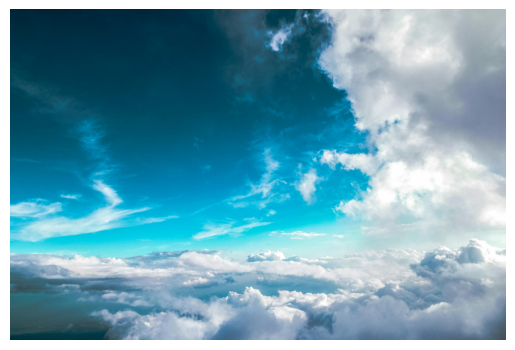

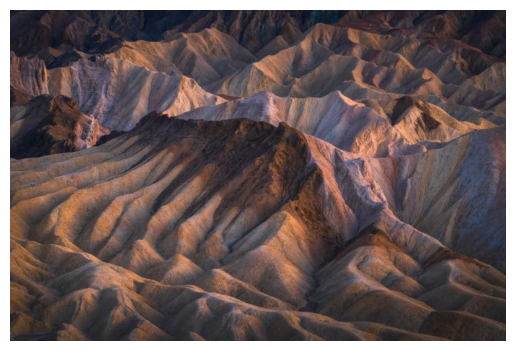

Failed to retrieve image from https://www.wildernessshots.com/wp-content/uploads/2019/09/Koosah-Falls-Oregon-Landscape-Photography-768x518.jpg, Status Code: 406


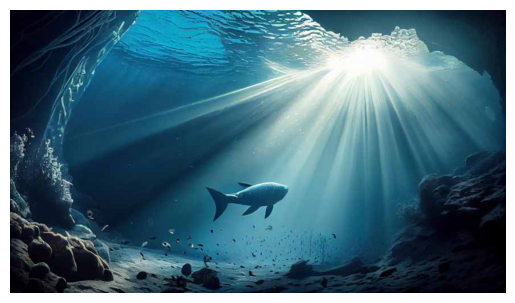

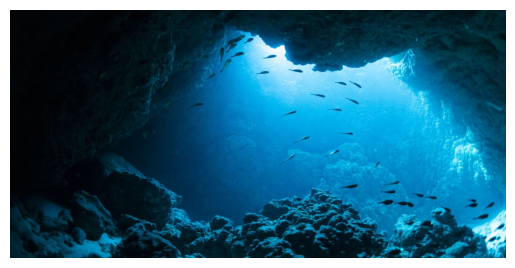

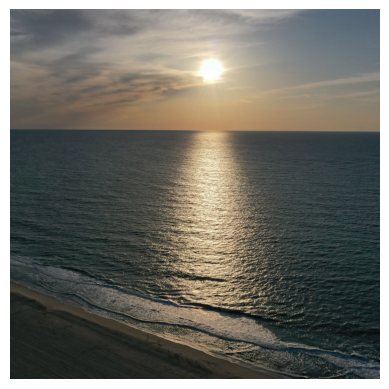

In [98]:
images=[]
for i,url in enumerate(urls):
    i=return_image(url)
    if i is not None:
        plt.imshow(i)
        plt.axis('off')
        plt.savefig(f'/tmp/url{i}.jpg')
        images.append(f'/tmp/url{i}.jpg')
        plt.show()

In [99]:
images

['/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=736x736 at 0x7F623693DDE0>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x7F623693D6C0>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1470x980 at 0x7F623694EC80>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6480x4320 at 0x7F6236967FD0>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x534 at 0x7F6236967FD0>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=875x500 at 0x7F623694C100>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x600 at 0x7F62369A2170>.jpg',
 '/tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1600 at 0x7F62369BF2E0>.jpg']

In [100]:
prompts=['Sky','Clouds','Water','Fish','Trees']

In [101]:
model,process=clip.load('ViT-B/32',device=device)

In [102]:
processed_images=[process(Image.open(i)).unsqueeze(0).to(device) for i in images]

In [103]:
texts=clip.tokenize(prompts)

In [104]:
with torch.no_grad():
    image_features=torch.cat([model.encode_image(image) for image in processed_images])
    text_features=model.encode_text(texts)

In [105]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [108]:
similarity=(100.0*image_features @ text_features.T).softmax(dim=-1)

In [109]:
similarity

tensor([[7.8434e-01, 2.1438e-01, 9.9007e-04, 1.0705e-04, 1.8154e-04],
        [5.1429e-01, 4.8513e-01, 3.2974e-04, 8.1374e-05, 1.6638e-04],
        [4.3646e-01, 5.4507e-01, 2.3989e-03, 9.8648e-05, 1.5969e-02],
        [5.7588e-01, 4.2328e-01, 5.4937e-04, 3.3881e-05, 2.5452e-04],
        [2.4102e-01, 3.6623e-01, 2.9133e-01, 9.7493e-03, 9.1674e-02],
        [1.5447e-02, 4.8816e-03, 4.0729e-01, 5.7140e-01, 9.8282e-04],
        [6.5749e-03, 6.5074e-03, 4.4677e-01, 5.3860e-01, 1.5553e-03],
        [5.2476e-01, 1.5916e-01, 2.8465e-01, 2.4515e-02, 6.9067e-03]])

In [128]:
sky=[similarity[i][0].item() for i in range(8)]
cloud=[similarity[i][1].item() for i in range(8)]
water=[similarity[i][2].item() for i in range(8)]
fish=[similarity[i][3].item() for i in range(8)]
tree=[similarity[i][4].item() for i in range(8)]

Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=736x736 at 0x7F623693DDE0>.jpg:


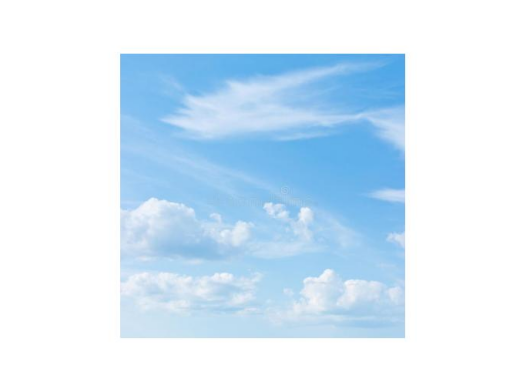

	Prompt 'Sky' : 0.7843
	Prompt 'Clouds' : 0.2144
	Prompt 'Water' : 0.0010
	Prompt 'Fish' : 0.0001
	Prompt 'Trees' : 0.0002
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x7F623693D6C0>.jpg:


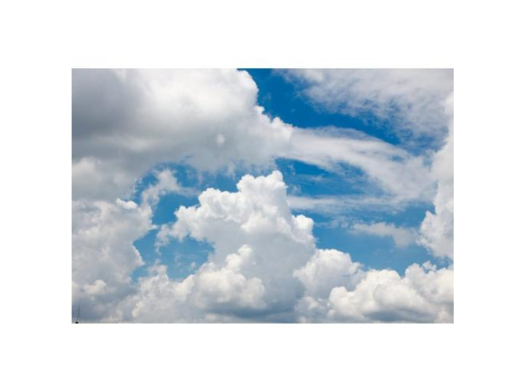

	Prompt 'Sky' : 0.5143
	Prompt 'Clouds' : 0.4851
	Prompt 'Water' : 0.0003
	Prompt 'Fish' : 0.0001
	Prompt 'Trees' : 0.0002
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1470x980 at 0x7F623694EC80>.jpg:


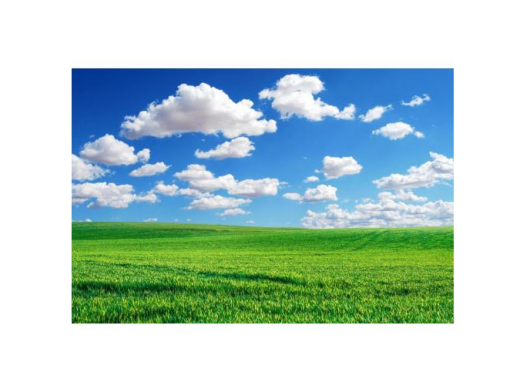

	Prompt 'Sky' : 0.4365
	Prompt 'Clouds' : 0.5451
	Prompt 'Water' : 0.0024
	Prompt 'Fish' : 0.0001
	Prompt 'Trees' : 0.0160
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=6480x4320 at 0x7F6236967FD0>.jpg:


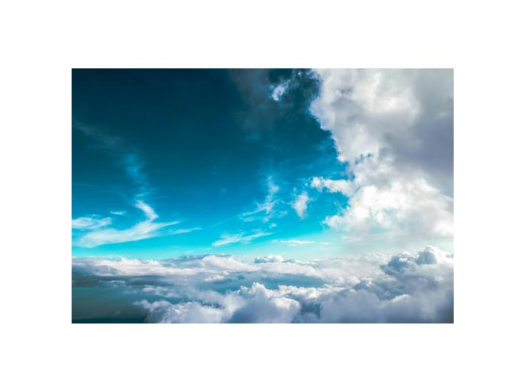

	Prompt 'Sky' : 0.5759
	Prompt 'Clouds' : 0.4233
	Prompt 'Water' : 0.0005
	Prompt 'Fish' : 0.0000
	Prompt 'Trees' : 0.0003
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x534 at 0x7F6236967FD0>.jpg:


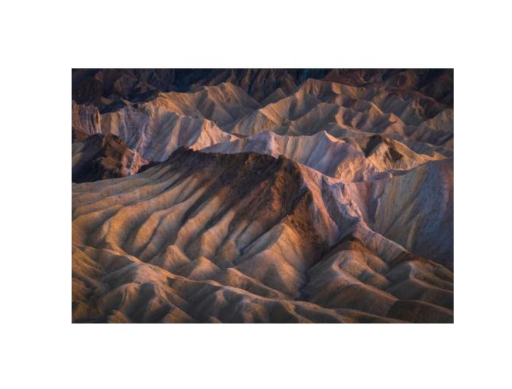

	Prompt 'Sky' : 0.2410
	Prompt 'Clouds' : 0.3662
	Prompt 'Water' : 0.2913
	Prompt 'Fish' : 0.0097
	Prompt 'Trees' : 0.0917
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=875x500 at 0x7F623694C100>.jpg:


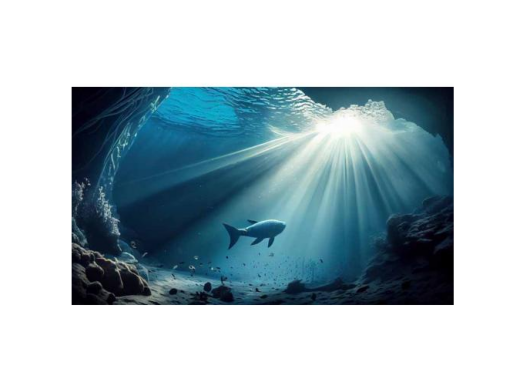

	Prompt 'Sky' : 0.0154
	Prompt 'Clouds' : 0.0049
	Prompt 'Water' : 0.4073
	Prompt 'Fish' : 0.5714
	Prompt 'Trees' : 0.0010
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x600 at 0x7F62369A2170>.jpg:


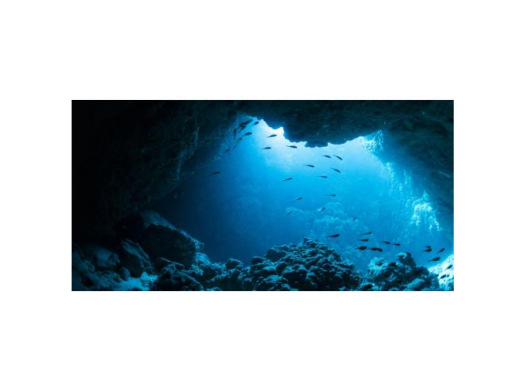

	Prompt 'Sky' : 0.0066
	Prompt 'Clouds' : 0.0065
	Prompt 'Water' : 0.4468
	Prompt 'Fish' : 0.5386
	Prompt 'Trees' : 0.0016
Image /tmp/url<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1600 at 0x7F62369BF2E0>.jpg:


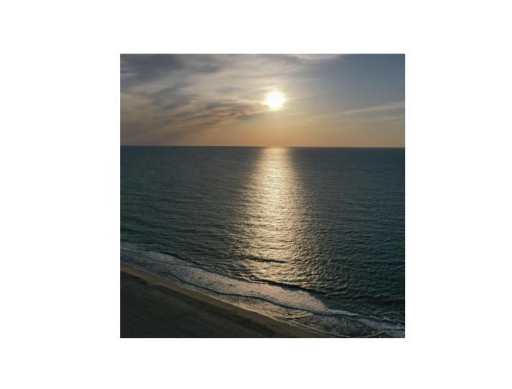

	Prompt 'Sky' : 0.5248
	Prompt 'Clouds' : 0.1592
	Prompt 'Water' : 0.2847
	Prompt 'Fish' : 0.0245
	Prompt 'Trees' : 0.0069


In [119]:
x=[]
for i, image_path in enumerate(images):
    print(f"Image {image_path}:")
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.show()
    x.append(image_path)
    for j, prompt_text in enumerate(prompts):
        print(f"\tPrompt '{prompt_text}' : {similarity[i][j].item():.4f}")
        

In [122]:
import pandas as pd

In [129]:
df=pd.DataFrame({'Images':x,'Sky':sky,'Cloud':cloud,'Tree':tree,'Fish':fish,'Water':water})

In [130]:
df

Images       Sky     Cloud  \
0  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.784339  0.214382   
1  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.514290  0.485133   
2  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.436462  0.545071   
3  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.575879  0.423283   
4  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.241023  0.366226   
5  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.015447  0.004882   
6  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.006575  0.006507   
7  /tmp/url<PIL.JpegImagePlugin.JpegImageFile ima...  0.524762  0.159163   

       Tree      Fish     Water  
0  0.000182  0.000107  0.000990  
1  0.000166  0.000081  0.000330  
2  0.015969  0.000099  0.002399  
3  0.000255  0.000034  0.000549  
4  0.091674  0.009749  0.291327  
5  0.000983  0.571401  0.407287  
6  0.001555  0.538595  0.446767  
7  0.006907  0.024515  0.284654

In [131]:
import numpy as np

In [132]:
similarity.argmax()

tensor(0)